In [3]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import StratifiedKFold

In [4]:
# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/Datasets/water_potability.csv")

In [5]:
# Display first 5 rows
df.head(5)

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

In [6]:
# Basic Information about Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [7]:
# Summary statistics
df.describe()

ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.594320    32.879761   8768.570828     1.583085    41.416840   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.093092   176.850538  15666.690297     6.127421   307.699498   
50%       7.036752   196.967627  20927.833607     7.130299   333.073546   
75%       8.062066   216.667456  27332.762127     8.114887   359.950170   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3114.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        16.175008     0.780382     0.487849  
min      181.483754        2.200000         0.738000     1.450000     0.000000  
25%      365.734414       12.065801        55.844536     3.439711     0.000000  
50%      421.884968       14.218338        66.622485     3.955028     0.000000  
75%      481.792304       16.557652        77.337473     4.500320     1.000000  
max      753.342620       28.300000       124.000000     6.739000     1.000000

In [8]:
# Check for missing values
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [9]:
# Handling missing values using KNN Imputation
knn_imputer = KNNImputer(n_neighbors=5)
df.iloc[:, :-1] = knn_imputer.fit_transform(df.iloc[:, :-1])

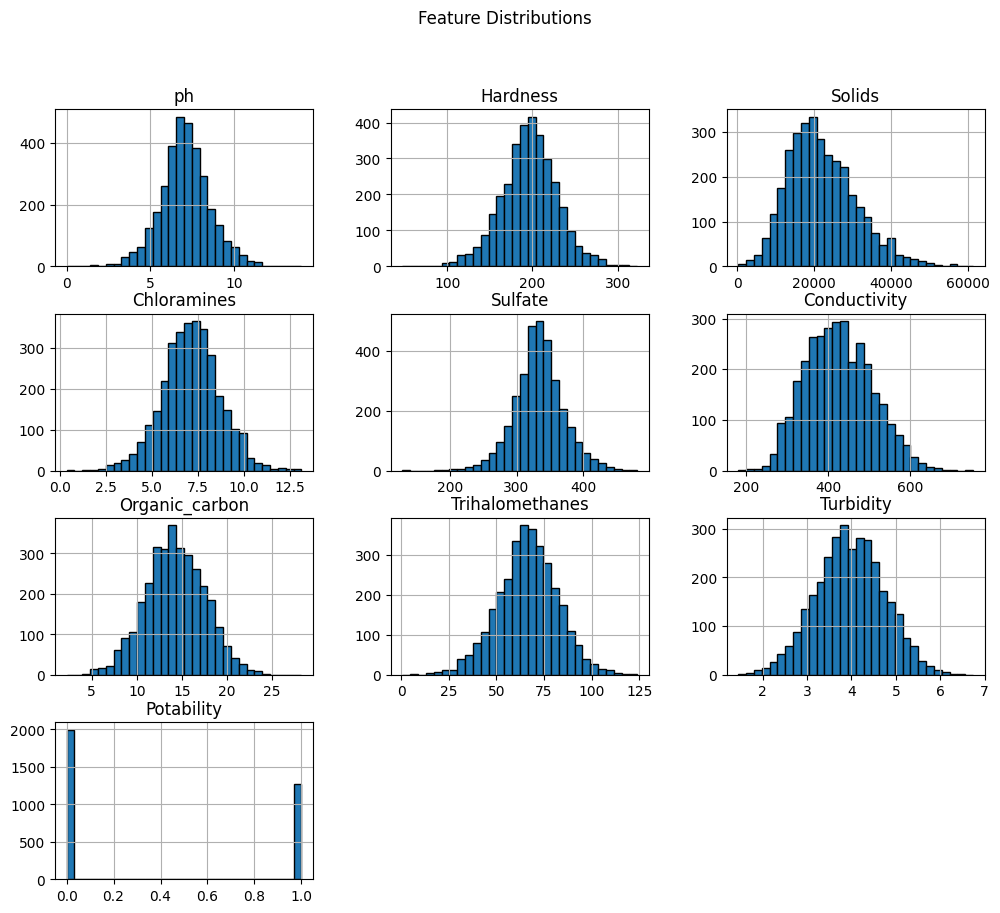

In [10]:
# Distribution of each feature
df.hist(figsize=(12, 10), bins=30, edgecolor='black')
plt.suptitle("Feature Distributions")
plt.show()



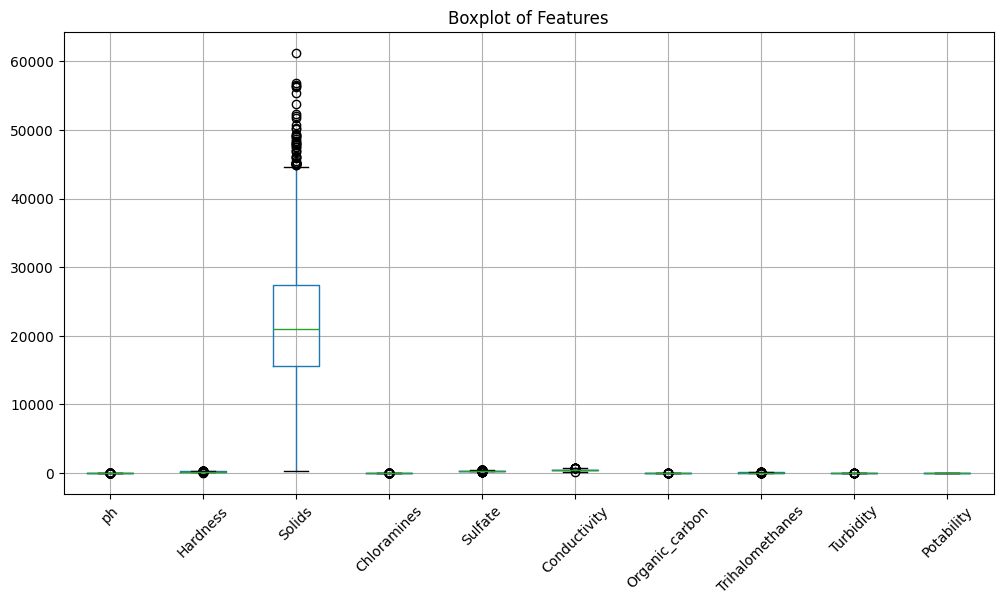

In [11]:
# Boxplots to detect outliers
plt.figure(figsize=(12, 6))
df.boxplot(rot=45)
plt.title("Boxplot of Features")
plt.show()

In [12]:
# Feature Scaling
scaler = StandardScaler()
df.iloc[:, :-1] = scaler.fit_transform(df.iloc[:, :-1])

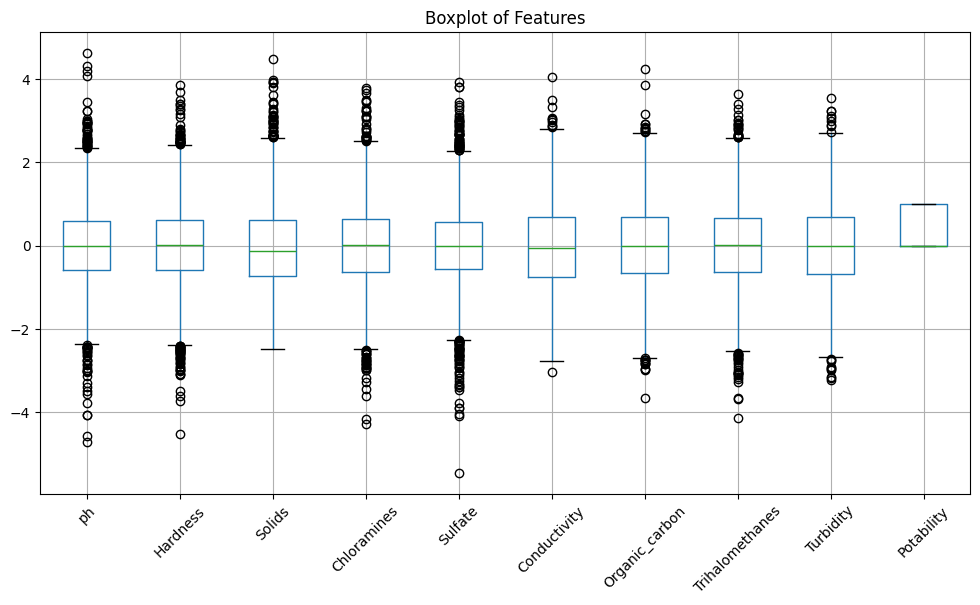

In [13]:
# Boxplots to detect outliers after scaling
plt.figure(figsize=(12, 6))
df.boxplot(rot=45)
plt.title("Boxplot of Features")
plt.show()

In [14]:
# Removing Outliers from All Columns using IQR method
for column in df.columns[:-1]:  # Exclude the target variable 'Potability'
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]



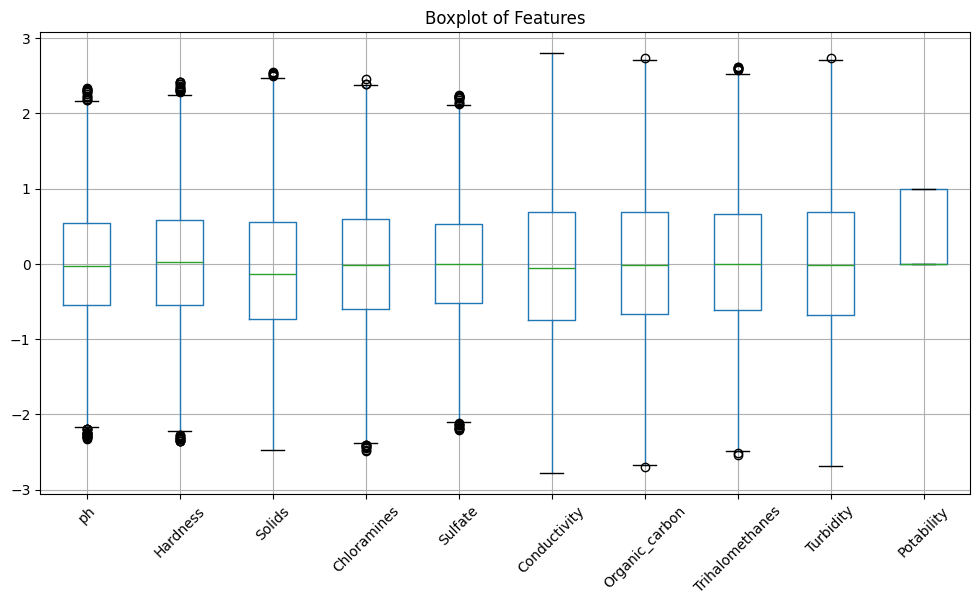

In [15]:
# Boxplots to detect outliers
plt.figure(figsize=(12, 6))
df.boxplot(rot=45)
plt.title("Boxplot of Features")
plt.show()

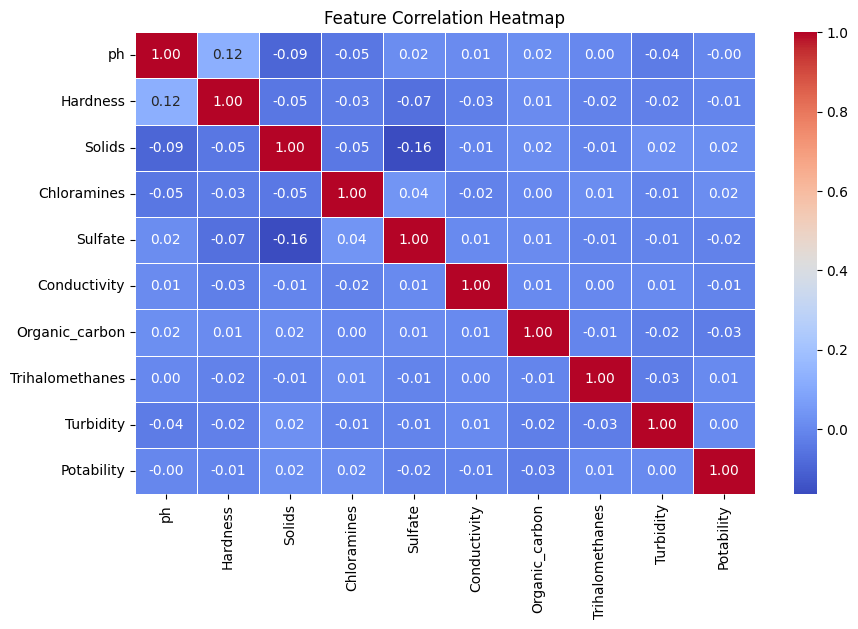

In [16]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt='.2f', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


<ipython-input-17-57bd73b13124>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Potability', data=df, palette='coolwarm')


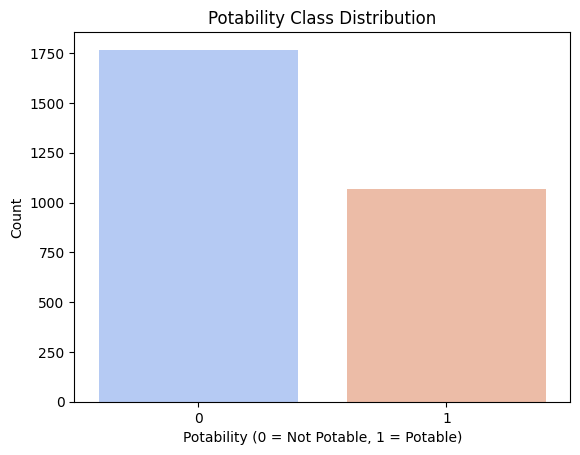

In [17]:
# Countplot for target variable (Potability)
sns.countplot(x='Potability', data=df, palette='coolwarm')
plt.title("Potability Class Distribution")
plt.xlabel("Potability (0 = Not Potable, 1 = Potable)")
plt.ylabel("Count")
plt.show()


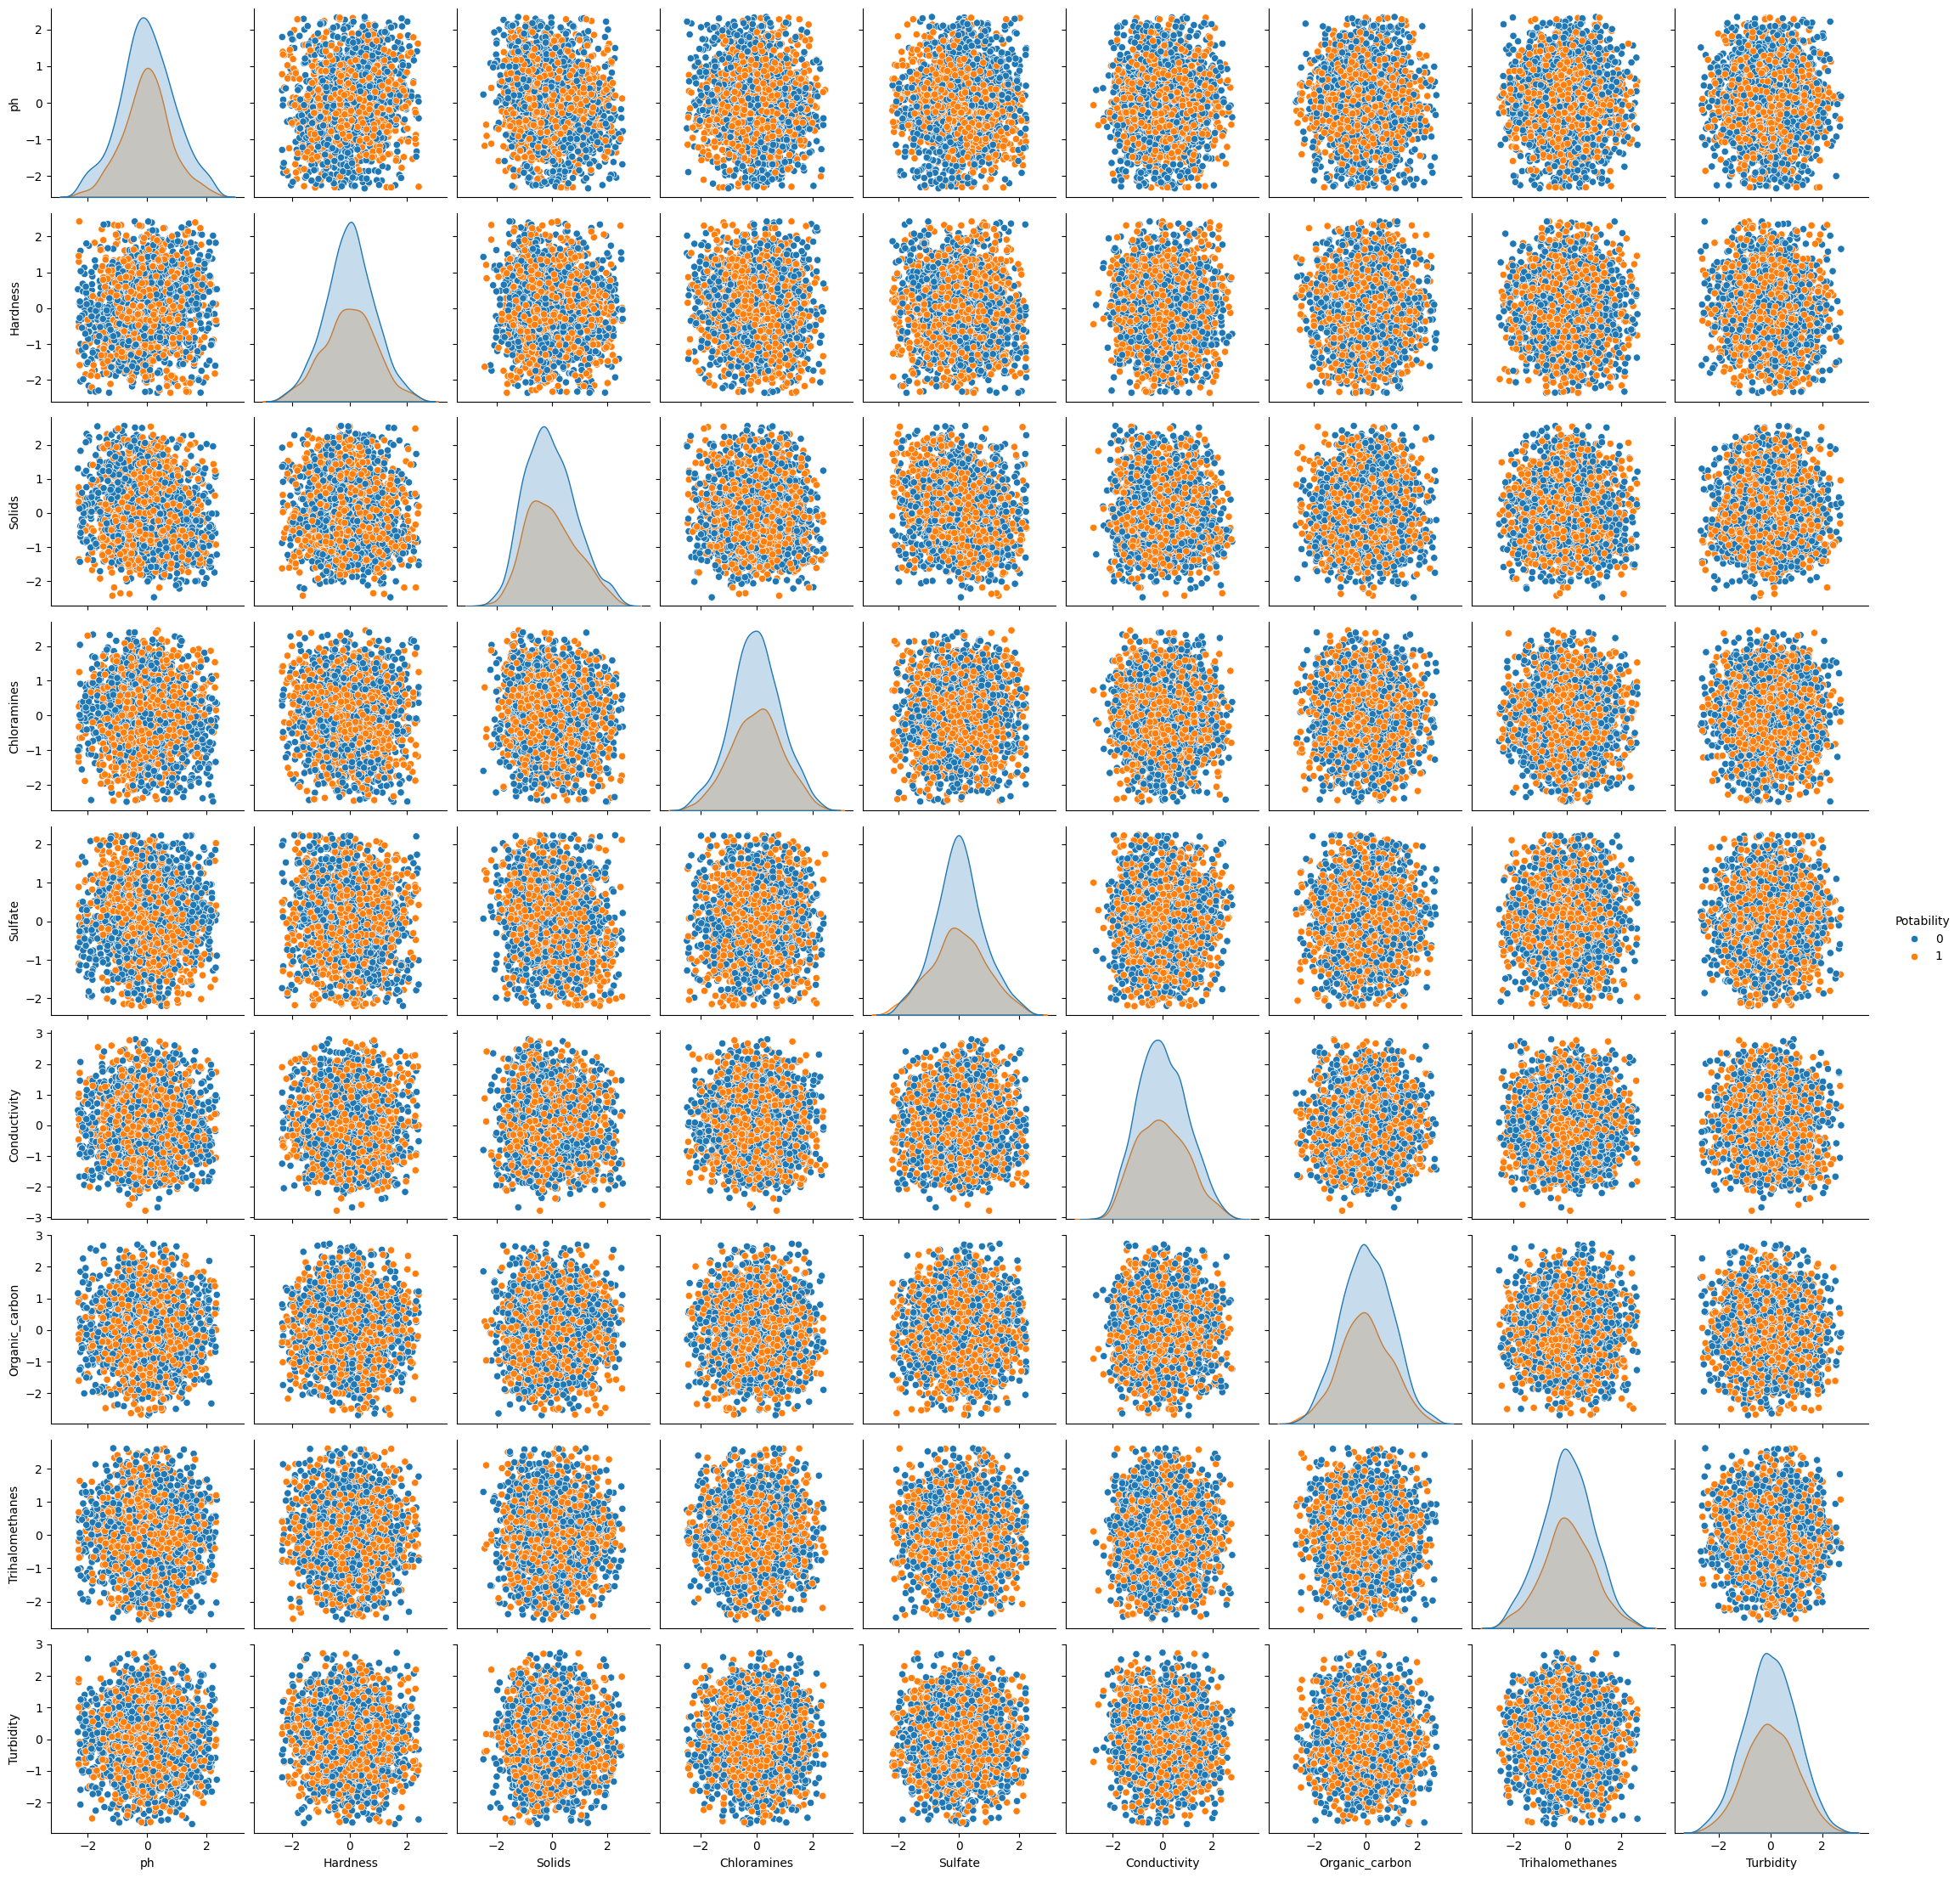

In [18]:
# Pairplots
sns.pairplot(df, hue="Potability", diag_kind="kde")
plt.show()


In [19]:
# class Balance
print("Class distribution:")
print(df['Potability'].value_counts(normalize=True))


Class distribution:
Potability
0    0.622841
1    0.377159
Name: proportion, dtype: float64


In [20]:
# Correlation of target variable with attributes
correlations = df.corr()["Potability"].sort_values(ascending=False)
print("Feature Correlations with Potability:\n", correlations)


Feature Correlations with Potability:
 Potability         1.000000
Solids             0.020837
Chloramines        0.016653
Trihalomethanes    0.008523
Turbidity          0.004582
ph                -0.004581
Hardness          -0.005672
Conductivity      -0.009847
Sulfate           -0.016243
Organic_carbon    -0.030224
Name: Potability, dtype: float64


In [21]:
# Separate features (X) and target (y)
X = df.drop(columns=['Potability'])  # Features
y = df['Potability']  # Target

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Check the sizes of the training and testing sets
print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")

Training set size: (2269, 9)
Testing set size: (568, 9)


In [22]:
# Define the models for comparison
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'SVM': SVC(probability=True),
    'kNN': KNeighborsClassifier()
}


In [23]:
# Function to evaluate models
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

    return {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC AUC': roc_auc
    }

# Evaluate all models
model_results = {}
for name, model in models.items():
    results = evaluate_model(model, X_train_scaled, X_test_scaled, y_train, y_test)
    model_results[name] = results

# Convert the results to a DataFrame for easy comparison
results_df = pd.DataFrame(model_results).T
print(results_df)


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


                     Accuracy  Precision    Recall  F1 Score   ROC AUC
Logistic Regression  0.623239   0.000000  0.000000  0.000000  0.486681
Decision Tree        0.598592   0.466667  0.457944  0.462264  0.570780
Random Forest        0.669014   0.632653  0.289720  0.397436  0.633765
Gradient Boosting    0.660211   0.632911  0.233645  0.341297  0.619614
SVM                  0.669014   0.685714  0.224299  0.338028  0.687351
kNN                  0.626761   0.506494  0.364486  0.423913  0.609377


In [24]:
# Hyperparameter grids for tuning
param_grids = {
    'Logistic Regression': {
        'C': [0.01, 0.1, 1, 10, 100],
        'penalty': ['l1', 'l2']
    },
    'Decision Tree': {
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'Gradient Boosting': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.05, 0.1],
        'max_depth': [3, 5, 7]
    },
    'SVM': {
        'C': [0.1, 1, 10, 100],
        'kernel': ['linear', 'rbf', 'poly'],
        'gamma': ['scale', 'auto']
    },
    'kNN': {
        'n_neighbors': [3, 5, 7, 9, 11],
        'metric': ['euclidean', 'manhattan', 'minkowski']
    }
}

In [25]:
# Function to evaluate models
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

    return {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC AUC': roc_auc
    }

In [27]:
# GridSearchCV for all models
best_models = {}
for name, model in models.items():
    print(f"Hyperparameter tuning for {name}...")
    grid_search = GridSearchCV(model, param_grids[name], cv=5, n_jobs=-1, verbose=2)
    grid_search.fit(X_train_scaled, y_train)
    best_models[name] = grid_search.best_estimator_
    print(f"Best Hyperparameters for {name}: {grid_search.best_params_}")

Hyperparameter tuning for Logistic Regression...
Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py", line 1193, in fit
    solver = _check_solver

Best Hyperparameters for Logistic Regression: {'C': 0.01, 'penalty': 'l2'}
Hyperparameter tuning for Decision Tree...
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Hyperparameters for Decision Tree: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10}
Hyperparameter tuning for Random Forest...
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Hyperparameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 50}
Hyperparameter tuning for Gradient Boosting...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Hyperparameters for Gradient Boosting: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 200}
Hyperparameter tuning for SVM...
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Hyperparameters for SVM: {'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}
Hyperparameter tuning for kNN...
Fitting 5 folds for each of 15 candidates, totalling 75 fits
Best

In [28]:
# Evaluate all models after hyperparameter tuning
model_results = {}
for name, model in best_models.items():
    results = evaluate_model(model, X_train_scaled, X_test_scaled, y_train, y_test)
    model_results[name] = results

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [29]:
# Convert the results to a DataFrame for easy comparison
results_df = pd.DataFrame(model_results).T
print("Model Performance Comparison (After Hyperparameter Tuning):")
print(results_df)

Model Performance Comparison (After Hyperparameter Tuning):
                     Accuracy  Precision    Recall  F1 Score   ROC AUC
Logistic Regression  0.623239   0.000000  0.000000  0.000000  0.487117
Decision Tree        0.623239   0.500000  0.369159  0.424731  0.592046
Random Forest        0.660211   0.608247  0.275701  0.379421  0.651882
Gradient Boosting    0.658451   0.692308  0.168224  0.270677  0.647394
SVM                  0.669014   0.685714  0.224299  0.338028  0.687325
kNN                  0.625000   0.503650  0.322430  0.393162  0.619462
